In [1]:
import numpy as np
import skfuzzy as fuzz

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

[Antecedent: quality, Antecedent: service, Consequent: tip]

13.28939958501693

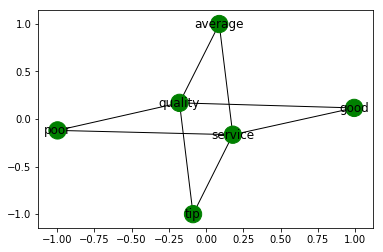

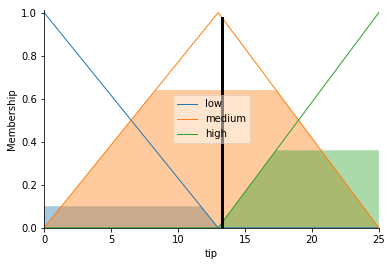

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

np.random.seed(0)

quality = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='quality')
service = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='service')
tip = ctrl.Consequent(universe=np.arange(0, 26, 1), label='tip')

quality.automf(number=3, variable_type='quality', names=[
    'poor', 'average', 'good'
])

service.automf(number=3, variable_type='quality', names=[
    'poor', 'average', 'good'
])

tip['low'] = fuzz.trimf(x=tip.universe, abc=[0, 0, 13])
tip['medium'] = fuzz.trimf(x=tip.universe, abc=[0, 13, 25])
tip['high'] = fuzz.trimf(x=tip.universe, abc=[13, 25, 25])

rule1 = ctrl.Rule(
    antecedent=quality['poor'] | service['poor'],
    consequent=tip['low'],
    label='low tip rule'
)

rule2 = ctrl.Rule(
    antecedent=service['average'],
    consequent=tip['medium'],
    label='medium tip rule'
)

rule3 = ctrl.Rule(
    antecedent=service['good'] | quality['good'],
    consequent=tip['high'],
    label='high tip rule'
)


tipping_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3])

tipping_ctrl.view_n()
list(tipping_ctrl.fuzzy_variables)


tipping = ctrl.ControlSystemSimulation(control_system=tipping_ctrl)
tipping.reset()
tipping.inputs({
    'quality': 4.5,
    'service': 6.8
})

tipping.compute()

# Mamdani 3 step inferente: aggregation, activation, accumulation
# tipping.compute_rule(rule1)
# tipping.print_state()

tipping.output['tip']


tip.view(sim=tipping)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1694258588>)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f16941a77f0>)

(<networkx.classes.digraph.DiGraph at 0x7f169420d7b8>,
 [['service', 'green'],
  ['poor', 'red'],
  ['average', 'red'],
  ['good', 'green'],
  ['tip', 'green'],
  ['quality', 'green'],
  ['poor', 'red'],
  ['average', 'red'],
  ['good', 'green'],
  ['tip', 'green']])

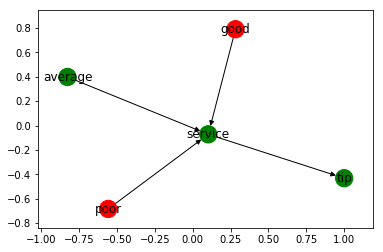

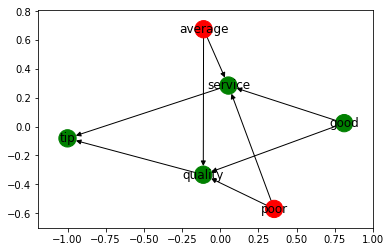

In [4]:
rule2.view_n()
rule3.view_n()
rule3.graph_n

OrderedDict([('total_quality', 4.079252347215023)])


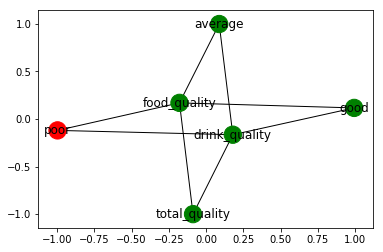

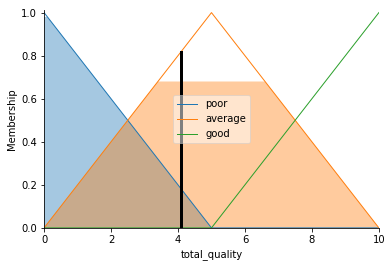

In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

np.random.seed(0)

# variable definitions

food_quality = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='food_quality')
drink_quality = ctrl.Antecedent(universe=np.arange(0, 11, 1), label='drink_quality')
total_quality = ctrl.Consequent(universe=np.arange(0, 11, 1), label='total_quality')

food_quality.automf(3)
drink_quality.automf(3)
total_quality.automf(3)

# rule definitions

rule_1 = ctrl.Rule((food_quality['poor'] & drink_quality['poor']) | food_quality['average'], total_quality['poor'])
rule_2 = ctrl.Rule(food_quality['average'] & drink_quality['average'], total_quality['average'])
rule_3 = ctrl.Rule(food_quality['good'] | drink_quality['good'], total_quality['good'])

# system definition

quality_system = ctrl.ControlSystem([rule_1, rule_2, rule_3])
quality_sim = ctrl.ControlSystemSimulation(quality_system)

# system evaluation

quality_sim.inputs({
    'food_quality': 4.9,
    'drink_quality': 3.4
})
quality_sim.compute()

# visualize results

quality_system.view_n()
print(quality_sim.output)
total_quality.view(sim=quality_sim)

In [29]:

# fuzzy_values will be a standard partition of the universe

definitions = {
    'variables': {
        'average_speed': {
            'crisp_universe': [0, 101, 1],
            'fuzzy_values': ['slow', 'medium', 'fast']
        },
        'journey_time': {
            'crisp_universe': [0, 11, 1],
            'fuzzy_values': ['short, medium', 'long']
        },
        'comfort': {
            'crisp_universe': [0, 11, 1],
            'fuzzy_values': ['low', 'medium', 'high']
        },
        'driving': {
            'crisp_universe': [0, 11, 1],
            'fuzzy_values': ['bad', 'average', 'good']
        },
        'tip': {
            'crisp_universe': [0, 26, 1],
            'fuzzy_values': ['small', 'medium', 'big']
        }
    },
    'rules': [{
        'if': [
            [
                ['average_speed', 'high']
            ],
            [
                ['comfort', 'high'], ['comfort', 'medium']
            ]
        ],
        'then': ['driving', 'good']
    }, {
        'if': [
            [
                ['driving', 'good']
            ],
            [
                ['journey_time', 'short']
            ]
        ],
        'then': ['tip', 'big']
    }, {
        'if': [
            [
                ['driving', 'good'],
                ['driving', 'average']
            ],
            [
                ['journey_time', 'medium']
            ]
        ],
        'then': ['tip', 'moderate']
    }, {
        'if': [
            [
                ['driving', 'average']
            ],
            [
                ['journey_time', 'moderate']
            ]
        ],
        'then': ['tip', 'small']
    }]
}

inputs = {
    'average_speed': 88.3,
    'journey_time': 2.3,
    'comfort': 7.8
}

raw_rules = [
    'average_speed = high & (comfort = high | comfort = medium) => driving = good',
    'driving = good & journey_time = short => tip = big',
    '(driving = good | driving = average) & journey_time = medium => tip = moderate',
    'driving = bad & journey_time = long => tip = small'
]

dependency_graph = {
    'driving': ['average_speed', 'comfort'],
    'tip': ['driving', 'journey_time'] # set
}
